<a href="https://colab.research.google.com/github/anujott-codes/Credit-Loan-Approval/blob/main/Credit_Approval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Import Libraries

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report, accuracy_score
from xgboost import XGBClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

import warnings
warnings.filterwarnings('ignore')

##Credit Card Approval

###import dataset

In [2]:
#using credit dataset from kaggle derived from UCI
credit_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Machine Learning/Project/Credit Card and Loan Approval/credit_approval_dataset.csv")
credit_df.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1


###EDA

In [3]:
#info regarding dataset
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    int64  
 1   Age             690 non-null    float64
 2   Debt            690 non-null    float64
 3   Married         690 non-null    int64  
 4   BankCustomer    690 non-null    int64  
 5   Industry        690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    int64  
 9   Employed        690 non-null    int64  
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    int64  
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    int64  
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    int64  
dtypes: float64(3), int64(10), object(3)
memory usage: 86.4+ KB


In [4]:
#check null values
credit_df.isna().sum()

,0
Gender,0
Age,0
Debt,0
Married,0
BankCustomer,0
Industry,0
Ethnicity,0
YearsEmployed,0
PriorDefault,0
Employed,0


In [5]:
#check duplicates
credit_df.duplicated().sum()

np.int64(0)

In [6]:
#unique values per column
credit_df.nunique()

,0
Gender,2
Age,350
Debt,215
Married,2
BankCustomer,2
Industry,14
Ethnicity,5
YearsEmployed,132
PriorDefault,2
Employed,2


In [7]:
#description of the dataset
credit_df.describe()

,Gender,Age,Debt,Married,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,ZipCode,Income,Approved
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000
mean,0.695652,31.514116,4.758725,0.760870,0.763768,2.223406,0.523188,0.427536,2.40000,0.457971,180.547826,1017.385507,0.444928
std,0.460464,11.860245,4.978163,0.426862,0.425074,3.346513,0.499824,0.495080,4.86294,0.498592,173.970323,5210.102598,0.497318
min,0.000000,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.670000,1.000000,1.000000,1.000000,0.165000,0.000000,0.000000,0.00000,0.000000,60.000000,0.000000,0.000000
50%,1.000000,28.460000,2.750000,1.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,160.000000,5.000000,0.000000
75%,1.000000,37.707500,7.207500,1.000000,1.000000,2.625000,1.000000,1.000000,3.00000,1.000000,272.000000,395.500000,1.000000
max,1.000000,80.250000,28.000000,1.000000,1.000000,28.500000,1.000000,1.000000,67.00000,1.000000,2000.000000,100000.000000,1.000000


In [8]:
#unique industries
credit_df['Industry'].unique()

array(['Industrials', 'Materials', 'CommunicationServices', 'Transport',
       'InformationTechnology', 'Financials', 'Energy', 'Real Estate',
       'Utilities', 'ConsumerDiscretionary', 'Education',
       'ConsumerStaples', 'Healthcare', 'Research'], dtype=object)

In [9]:
credit_df['Citizen'].unique()

array(['ByBirth', 'ByOtherMeans', 'Temporary'], dtype=object)

In [10]:
#extracting numerical features and categorical features
num_features = credit_df.select_dtypes(exclude='O').columns.to_list()
cat_features = credit_df.select_dtypes(include='O').columns.to_list()

print("----- Numerical Features -----")
print(num_features)
print(f"Total : {len(num_features)}")
print("\n")
print("----- Categorical Features -----")
print(cat_features)
print(f"Total : {len(cat_features)}")

----- Numerical Features -----
['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore', 'DriversLicense', 'ZipCode', 'Income', 'Approved']
Total : 13


----- Categorical Features -----
['Industry', 'Ethnicity', 'Citizen']
Total : 3


In [11]:
#function to plot distributions
def plot(df, col ,num):
  plt.subplot(4,4,num)
  sns.histplot(data = df,x=col,kde=True, color='skyblue')
  plt.title(f"{col} Distribution")
  plt.xlabel(" ")

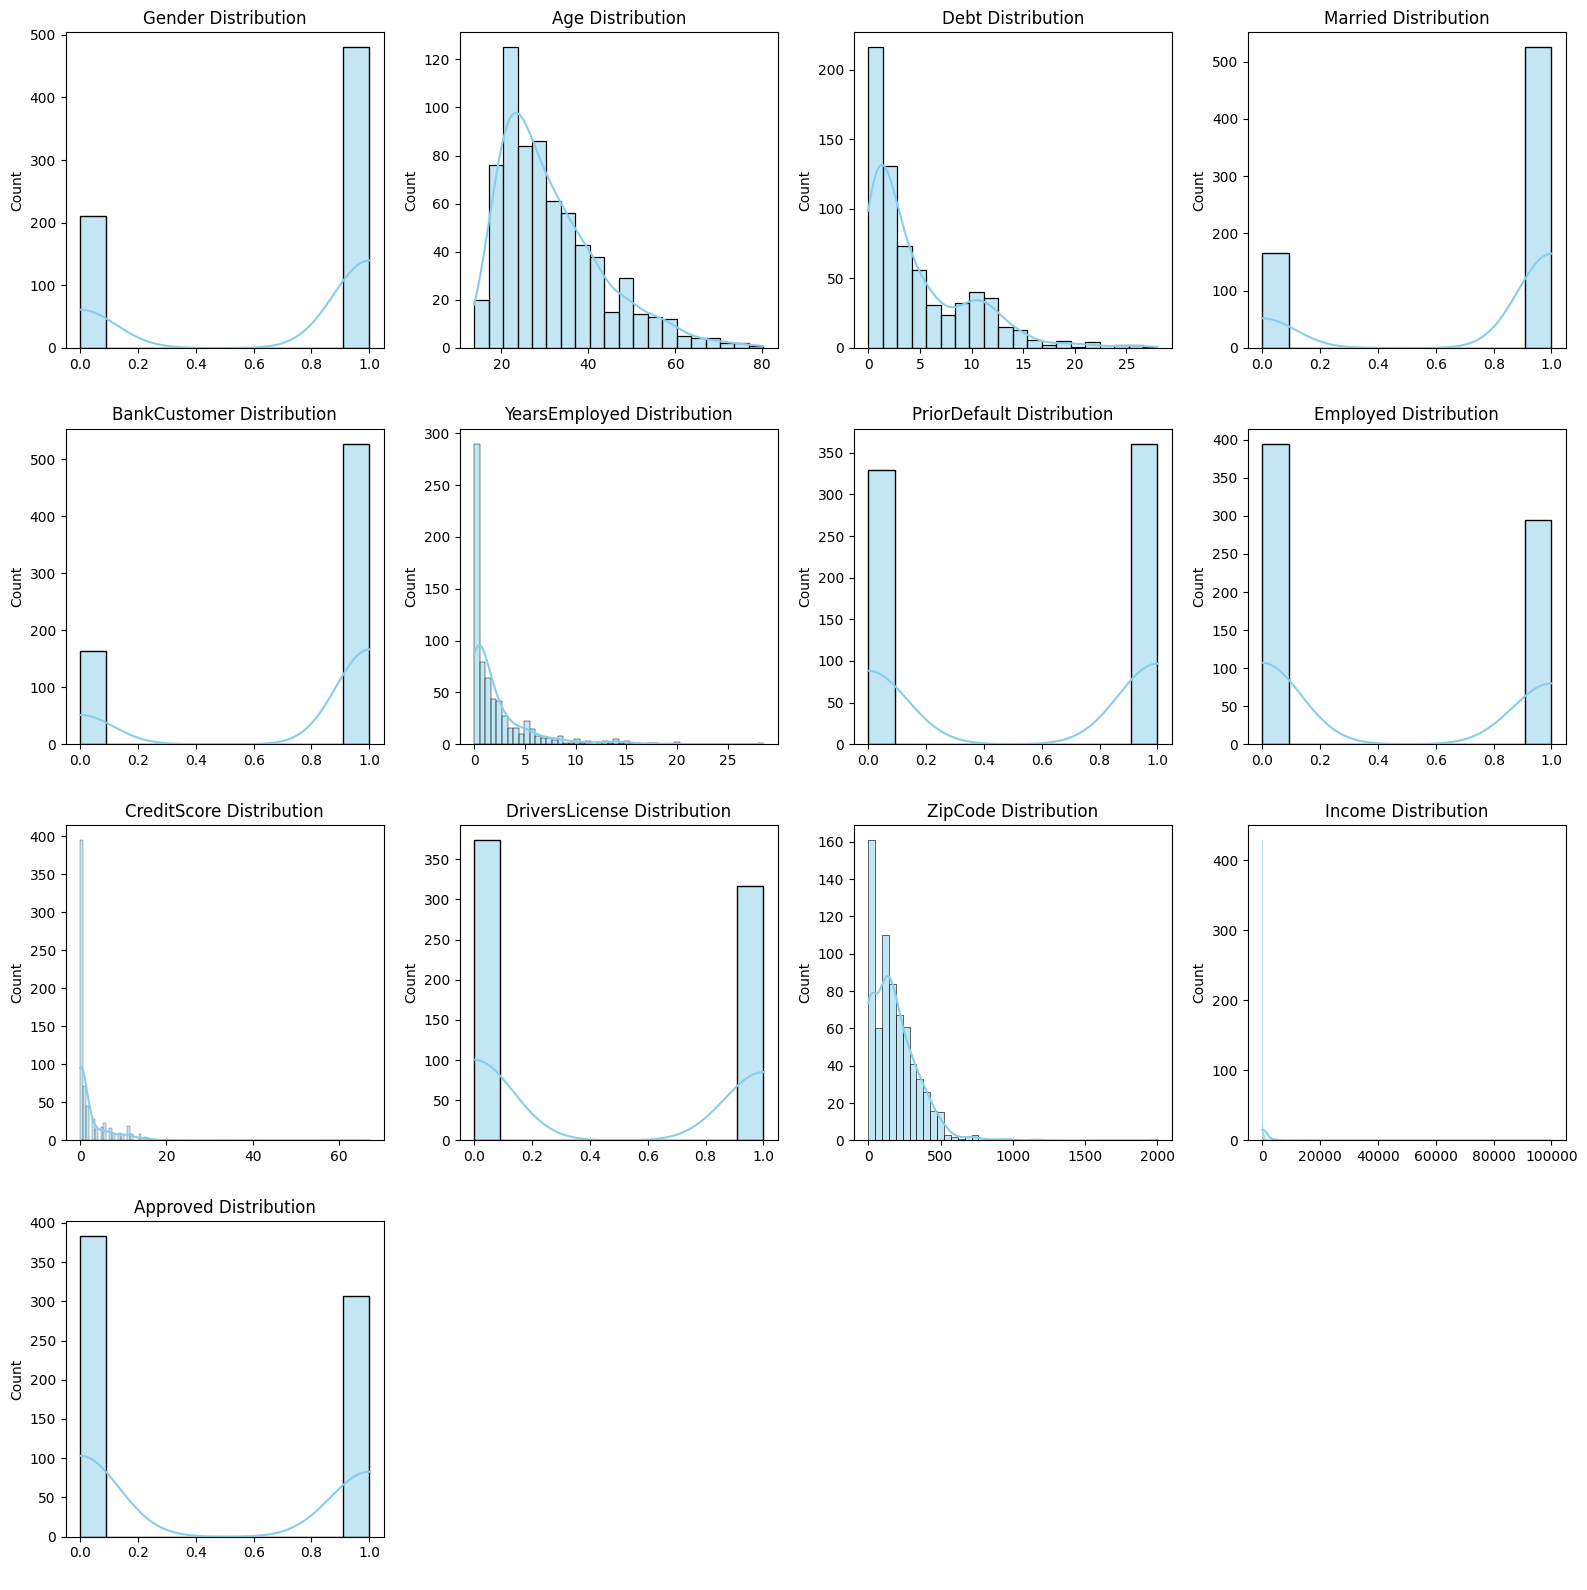

In [12]:
#plotting distributions
plt.figure(figsize=(16,16))
for i,col in enumerate(num_features):
  plot(credit_df,col,i+1)

plt.tight_layout()
plt.show()

Debt,Incmome and Credit Score have been already scaled

In [13]:
#function for pie chart
def pie_plot(col, num, df=credit_df):
    plt.subplot(3,3,num)
    plt.pie(
        df[col].value_counts(),
        labels=df[col].value_counts().index,
        autopct='%1.1f%%',
        colors=sns.color_palette('pastel')
    )
    plt.title(f"{col} Distribution")


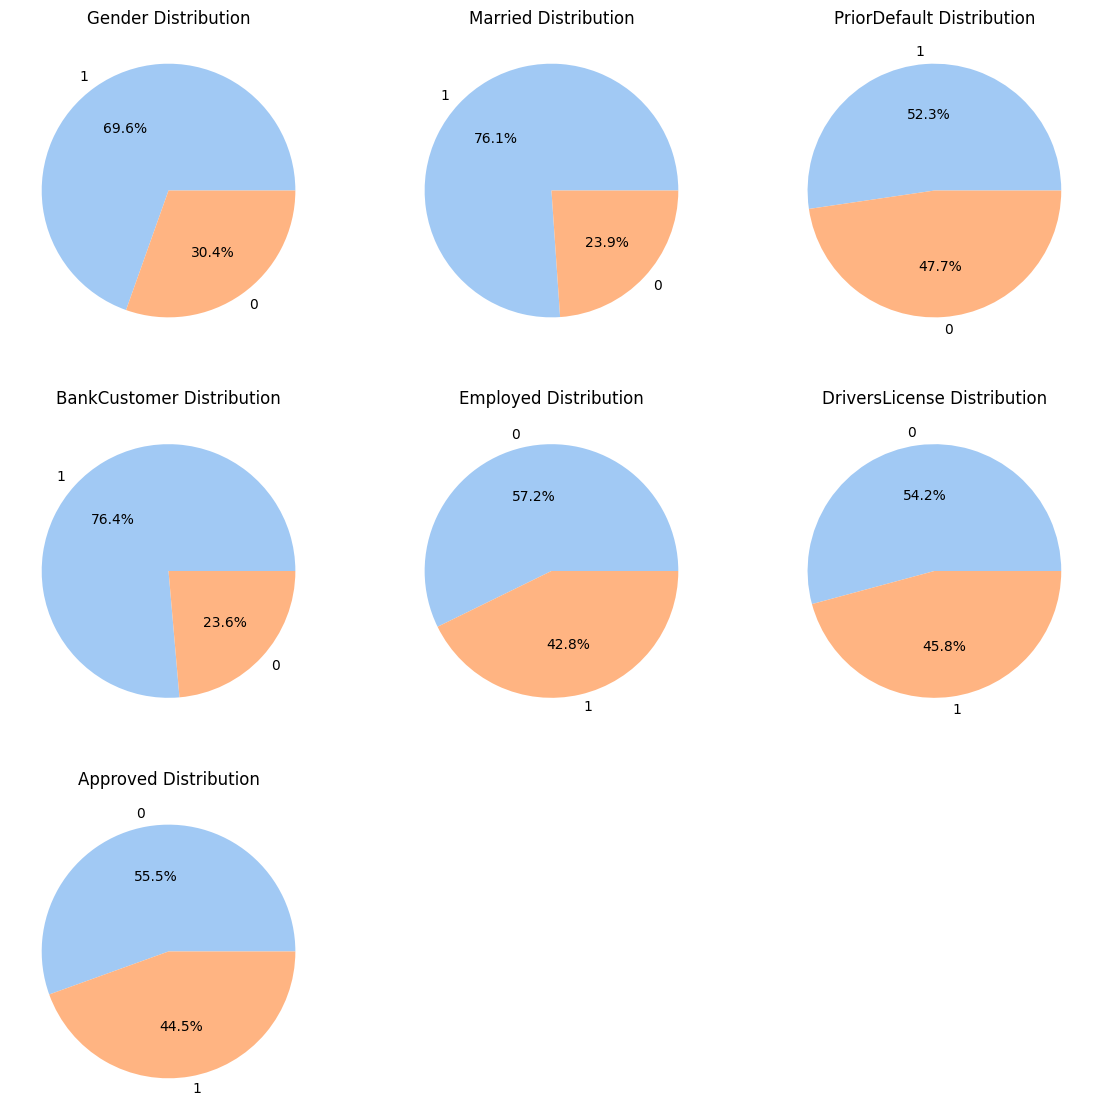

In [14]:
#pie chart for binary distributions
plt.figure(figsize=(14,14))
binary_features = ['Gender','Married','PriorDefault','BankCustomer','Employed','DriversLicense','Approved']
for i,col in enumerate(binary_features):
  pie_plot(col,i+1)
plt.show()

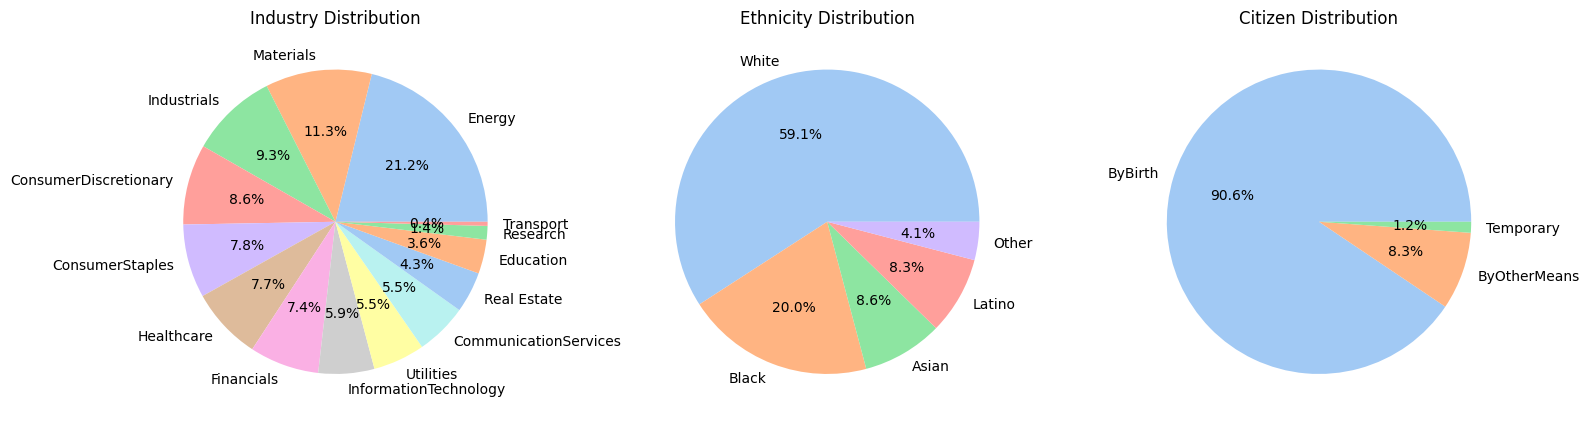

In [15]:
#pie chart for categorical features
plt.figure(figsize=(16,16))
for i,col in enumerate(cat_features):
  pie_plot(col,i+1)

plt.tight_layout()
plt.show()

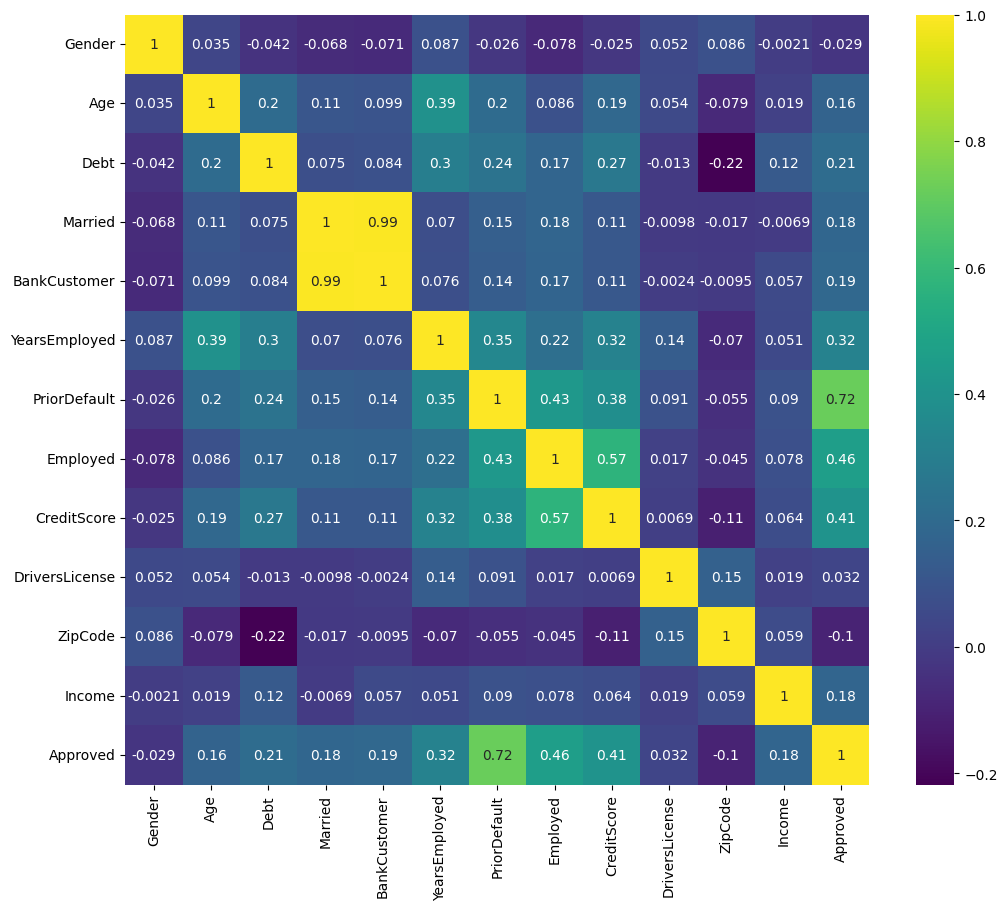

In [16]:
#check collinearity and feature correlation
plt.figure(figsize=(12,10))
numeric_df = credit_df.select_dtypes(exclude='O')
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, cmap='viridis',annot=True)
plt.show()

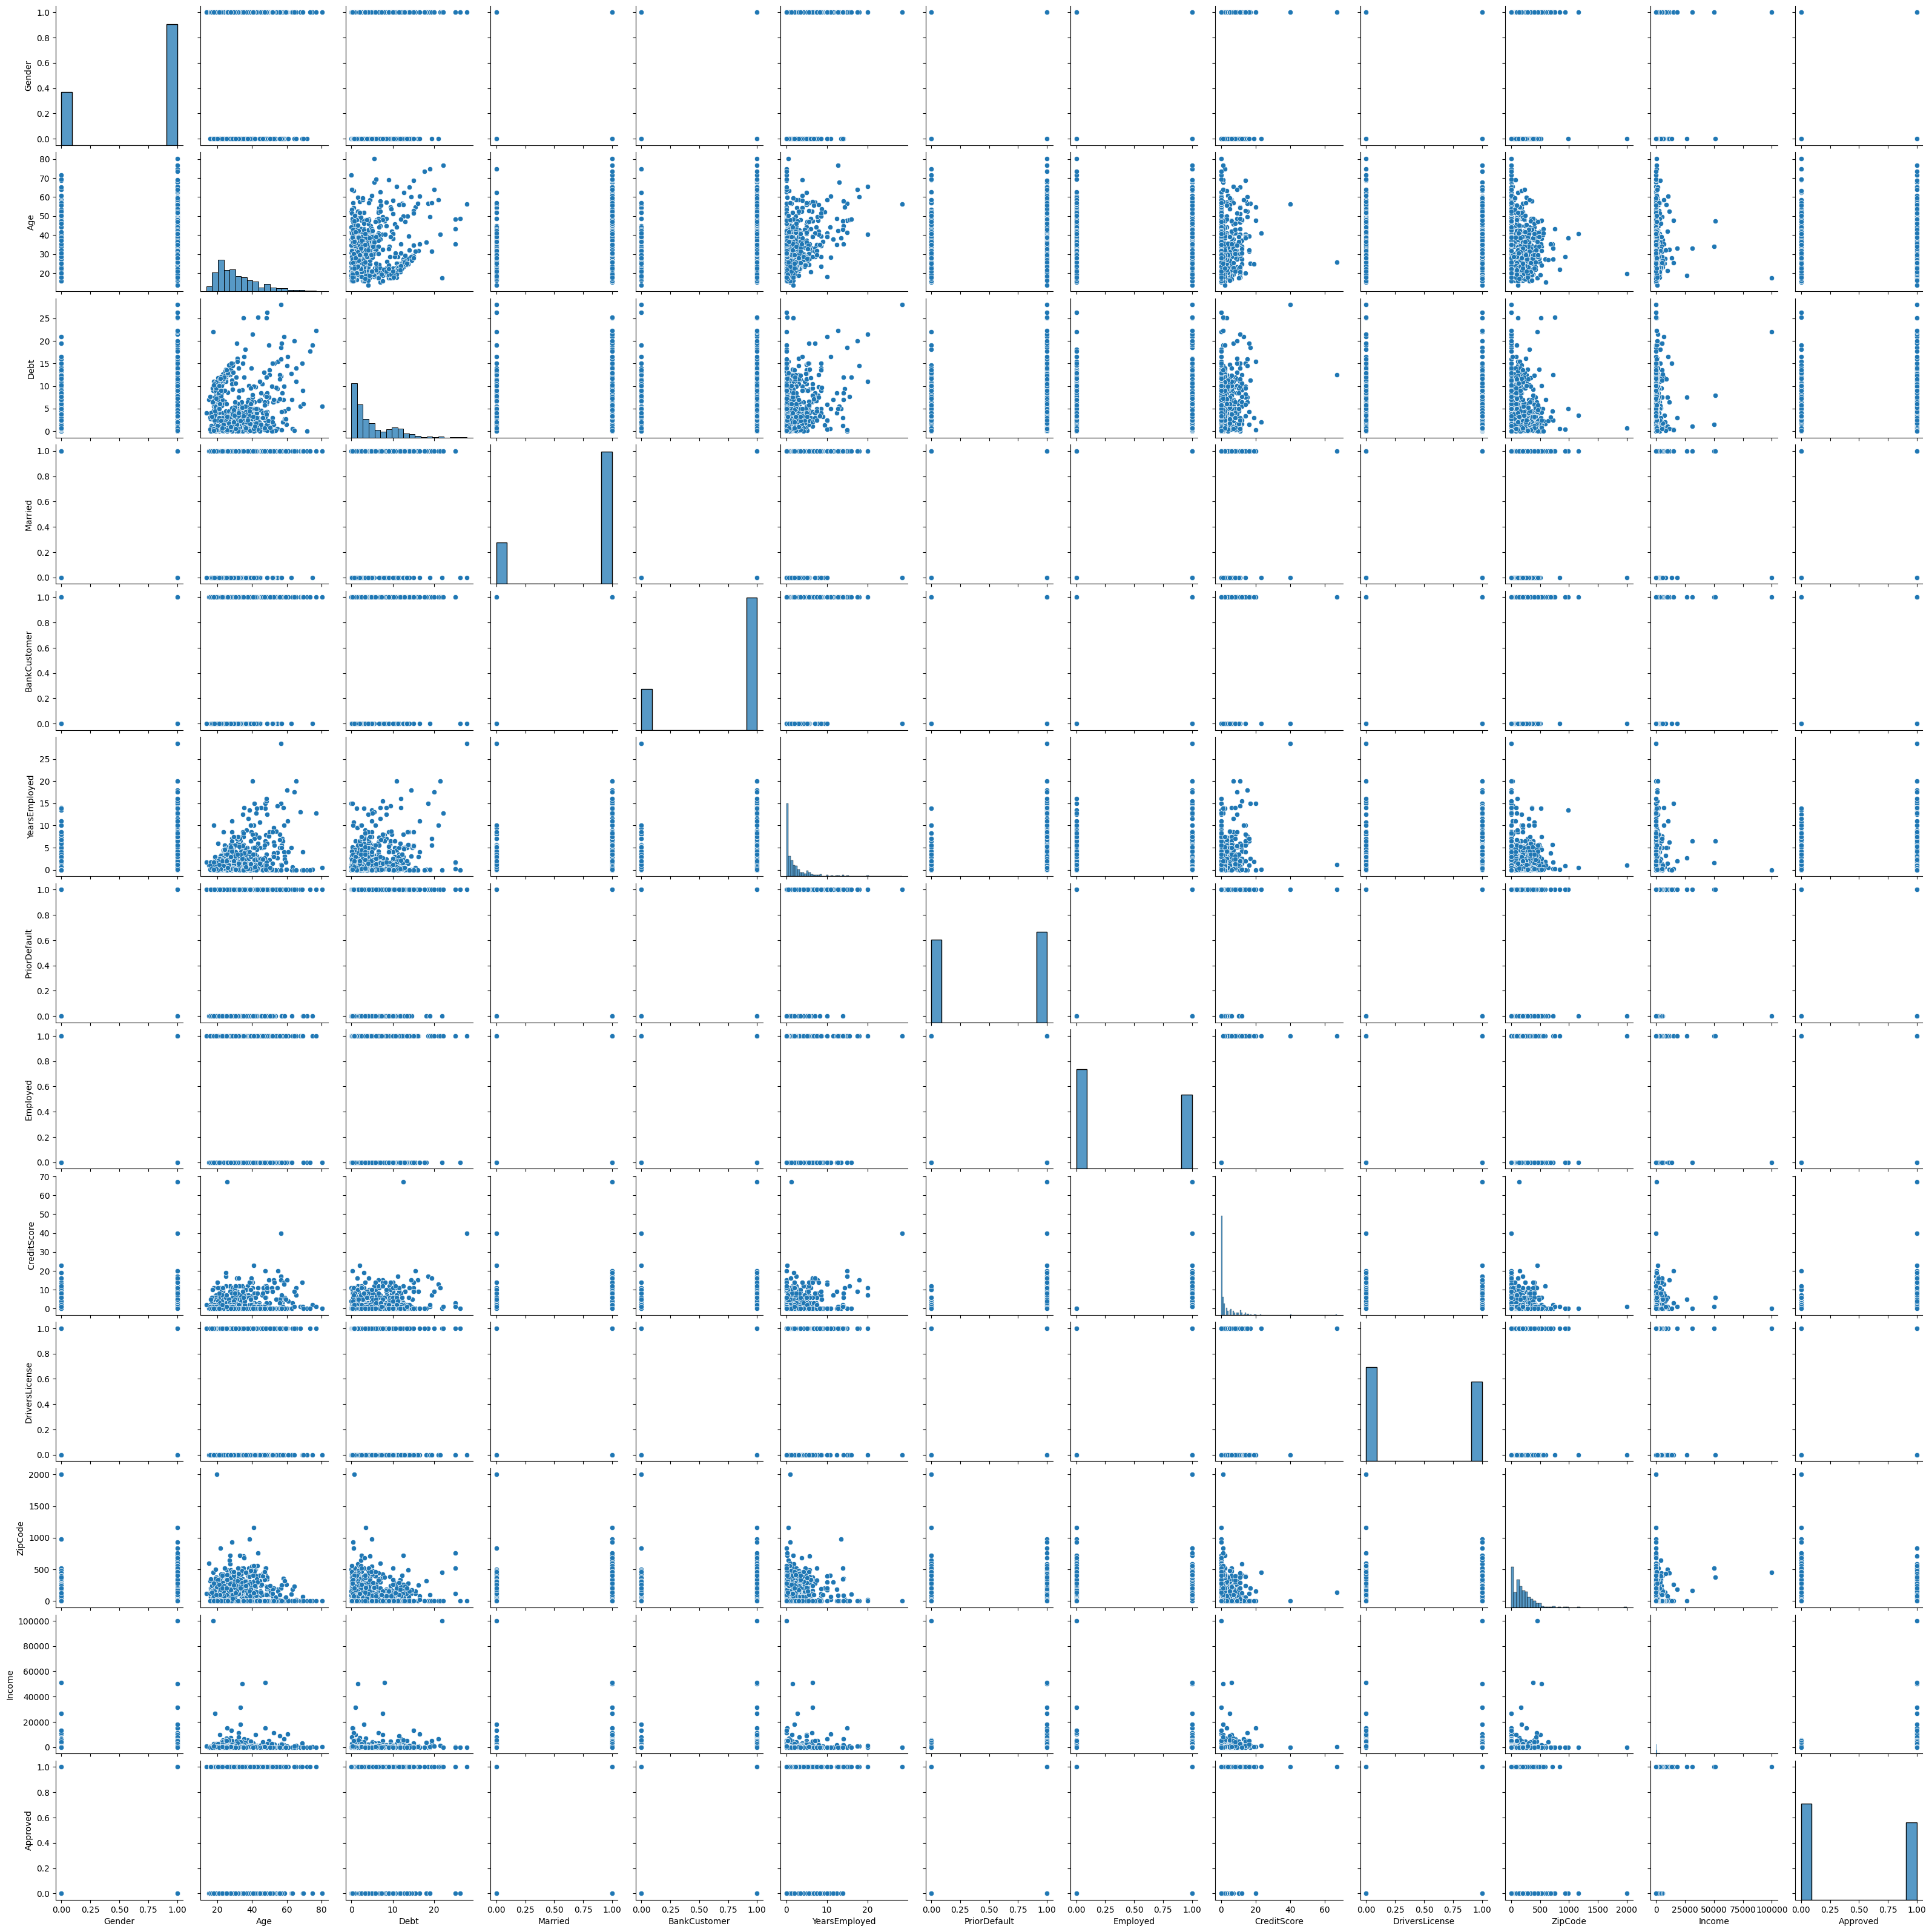

In [17]:
#pairplot
sns.pairplot(data = credit_df)
plt.show()

In [18]:
#dropping less informative features
final_df = credit_df.copy()
final_df = final_df.drop(columns=['Ethnicity','ZipCode'])
final_df.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,Income,Approved
0,1,30.83,0.000,1,1,Industrials,1.25,1,1,1,0,ByBirth,0,1
1,0,58.67,4.460,1,1,Materials,3.04,1,1,6,0,ByBirth,560,1
2,0,24.50,0.500,1,1,Materials,1.50,1,0,0,0,ByBirth,824,1
3,1,27.83,1.540,1,1,Industrials,3.75,1,1,5,1,ByBirth,3,1
4,1,20.17,5.625,1,1,Industrials,1.71,1,0,0,0,ByOtherMeans,0,1


In [19]:
final_df.shape

(690, 14)

In [20]:
#continuous distributions
continuous_features = ['Age','Debt','YearsEmployed','CreditScore','Income']

In [21]:
#function for box plot to analyse outliers
def boxplot(col,num,df=final_df):
  plt.subplot(3,3,num)
  sns.set_style('dark')
  sns.boxplot(data = df,x = col, color='purple')
  plt.title(f'{col} Boxplot Distribution')

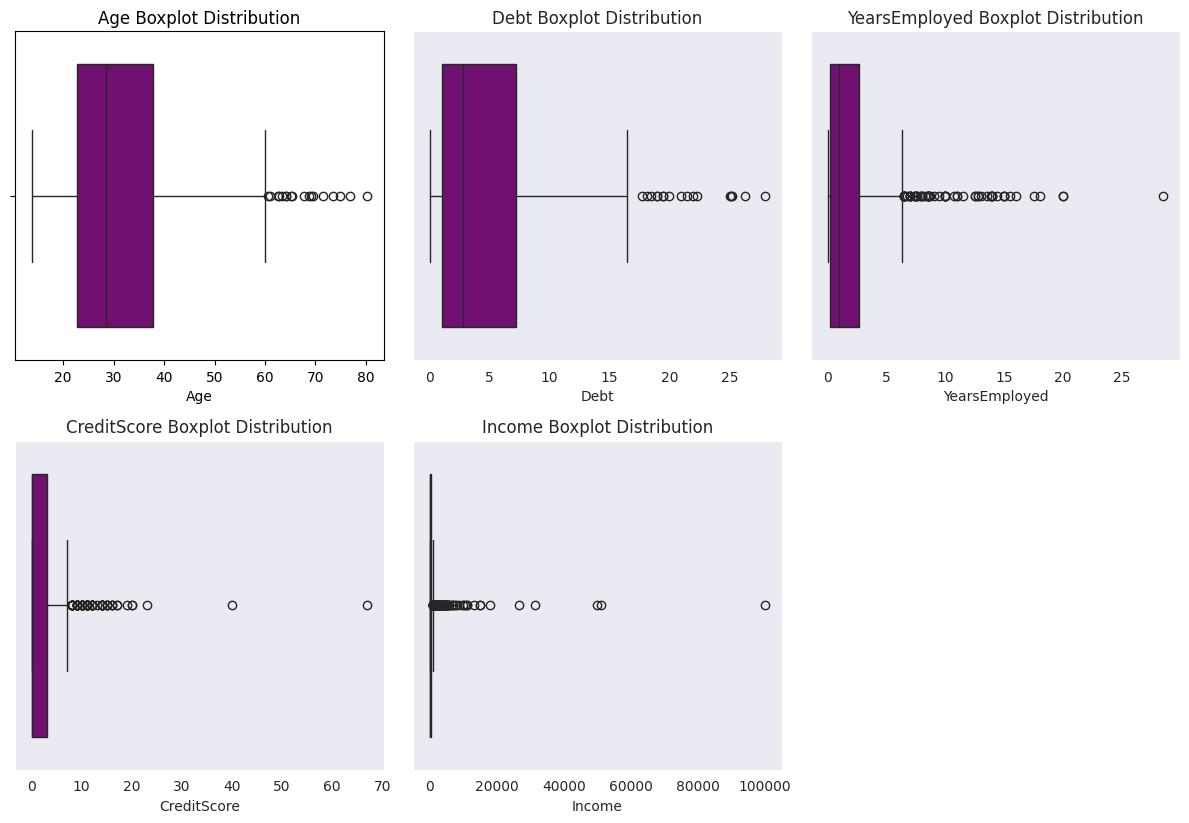

In [22]:
#plotting boxplot for continuous distributions
plt.figure(figsize=(12,12))
for i,col in enumerate(continuous_features):
  boxplot(col,i+1)

plt.tight_layout()
plt.show()

##Data Split

In [23]:
X = final_df.drop(columns = ['Approved'])
y = final_df['Approved']

In [24]:
X.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,Income
0,1,30.83,0.000,1,1,Industrials,1.25,1,1,1,0,ByBirth,0
1,0,58.67,4.460,1,1,Materials,3.04,1,1,6,0,ByBirth,560
2,0,24.50,0.500,1,1,Materials,1.50,1,0,0,0,ByBirth,824
3,1,27.83,1.540,1,1,Industrials,3.75,1,1,5,1,ByBirth,3
4,1,20.17,5.625,1,1,Industrials,1.71,1,0,0,0,ByOtherMeans,0


In [25]:
#data split for training set and test set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

In [26]:
X_train.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,Income
177,0,26.08,8.665,1,1,ConsumerStaples,1.415,1,0,0,0,ByBirth,150
401,1,28.92,0.375,1,1,Energy,0.290,0,0,0,0,ByBirth,140
375,0,20.83,0.500,0,0,Education,1.000,0,0,0,0,ByBirth,0
299,1,22.17,12.125,1,1,Energy,3.335,0,1,2,1,ByBirth,173
45,1,54.33,6.750,1,1,Energy,2.625,1,1,11,1,ByBirth,284


In [27]:
X_test.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,Income
53,1,34.92,2.500,1,1,Industrials,0.000,1,0,0,1,ByBirth,200
52,1,37.42,2.040,1,1,Industrials,0.040,1,0,0,1,ByBirth,5800
407,0,19.58,0.665,0,0,Energy,1.000,0,1,1,0,ByBirth,2
191,1,42.00,0.205,1,1,ConsumerDiscretionary,5.125,1,0,0,0,ByBirth,0
492,1,39.25,9.500,1,1,CommunicationServices,6.500,1,1,14,0,ByBirth,4607


In [28]:
#setup preprocessor
#extracting numerical and categorical features
categorical_features = X_train.select_dtypes(include='O').columns.to_list()
binary_features.remove('Approved')

preprocessor = ColumnTransformer(
    transformers=[
        ('bin','passthrough',binary_features),
        ('num',StandardScaler(),continuous_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ]
)

#preprocessing X_train and X_test
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

In [29]:
#saving preprocessor for deployment
joblib.dump(preprocessor,'preprocessor.pkl')

['preprocessor.pkl']

In [30]:
#logistic Regression
lr = LogisticRegression(random_state = 42)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform 5-fold CV
lr_scores = cross_val_score(lr, X_train_preprocessed, y_train, cv=skf, scoring='accuracy')

print("Accuracy scores for each fold:", lr_scores)
print("Mean accuracy:", lr_scores.mean())
print("Standard deviation:", lr_scores.std())



Accuracy scores for each fold: [0.9009009  0.84684685 0.87272727 0.80909091 0.83636364]
Mean accuracy: 0.8531859131859131
Standard deviation: 0.03138830014843409


In [31]:
#SVC
svc = SVC(random_state = 42,probability=True)

# Perform 5-fold CV
svc_scores = cross_val_score(svc, X_train_preprocessed, y_train, cv=skf, scoring='accuracy')

print("Accuracy scores for each fold:", svc_scores)
print("Mean accuracy:", svc_scores.mean())
print("Standard deviation:", svc_scores.std())

Accuracy scores for each fold: [0.87387387 0.85585586 0.84545455 0.83636364 0.88181818]
Mean accuracy: 0.8586732186732189
Standard deviation: 0.01701256920776909


In [32]:
#KNN
knn = KNeighborsClassifier()

# Perform 5-fold CV
knn_scores = cross_val_score(knn, X_train_preprocessed, y_train, cv=skf, scoring='accuracy')

print("Accuracy scores for each fold:", knn_scores)
print("Mean accuracy:", knn_scores.mean())
print("Standard deviation:", knn_scores.std())

Accuracy scores for each fold: [0.9009009  0.81981982 0.83636364 0.82727273 0.77272727]
Mean accuracy: 0.8314168714168714
Standard deviation: 0.04110628995069803


In [33]:
#Naive Bayes
nb = GaussianNB()

# Perform 5-fold CV
nb_scores = cross_val_score(nb, X_train_preprocessed, y_train, cv=skf, scoring='accuracy')

print("Accuracy scores for each fold:", nb_scores)
print("Mean accuracy:", nb_scores.mean())
print("Standard deviation:", nb_scores.std())

Accuracy scores for each fold: [0.81081081 0.81981982 0.8        0.77272727 0.79090909]
Mean accuracy: 0.7988533988533989
Standard deviation: 0.016306880131539983


In [34]:
#RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform 5-fold CV
rf_scores = cross_val_score(rf, X_train_preprocessed, y_train, cv=skf, scoring='accuracy')

print("Accuracy scores for each fold:", rf_scores)
print("Mean accuracy:", rf_scores.mean())
print("Standard deviation:", rf_scores.std())

Accuracy scores for each fold: [0.87387387 0.83783784 0.87272727 0.82727273 0.81818182]
Mean accuracy: 0.845978705978706
Standard deviation: 0.023162385713179155


In [35]:
#GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=22)

# Perform 5-fold CV
gb_scores = cross_val_score(gb, X_train_preprocessed, y_train, cv=skf, scoring='accuracy')

print("Accuracy scores for each fold:", gb_scores)
print("Mean accuracy:", gb_scores.mean())
print("Standard deviation:", gb_scores.std())

Accuracy scores for each fold: [0.88288288 0.83783784 0.83636364 0.80909091 0.81818182]
Mean accuracy: 0.8368714168714169
Standard deviation: 0.025453111899230756


In [36]:
#XGBClassifier
xgb = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss',
    objective='binary:logistic'
)

# Perform 5-fold CV
xgb_scores = cross_val_score(xgb, X_train_preprocessed, y_train, cv=skf, scoring='accuracy')

print("Accuracy scores for each fold:", xgb_scores)
print("Mean accuracy:", xgb_scores.mean())
print("Standard deviation:", xgb_scores.std())

Accuracy scores for each fold: [0.85585586 0.83783784 0.82727273 0.84545455 0.80909091]
Mean accuracy: 0.835102375102375
Standard deviation: 0.016020342692742363


LogisticRegression, SVC, Random Forests perform well

##Evaluation on Testing Set

In [37]:
#logistic regression
lr.fit(X_train_preprocessed,y_train)

#prediction on training set
ypred_train_lr = lr.predict(X_train_preprocessed)

#prediction on testing set
ypred_test_lr = lr.predict(X_test_preprocessed)

#classifiction report for training set
clf_report_train_lr = classification_report(y_train,ypred_train_lr)
print("----- Classification report for Training Set -----")
print(clf_report_train_lr)

#classification report for testing set
clf_report_test_lr = classification_report(y_test,ypred_test_lr)
print("----- Classification report for Testing Set -----")
print(clf_report_test_lr)

----- Classification report for Training Set -----
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       306
           1       0.84      0.87      0.85       246

    accuracy                           0.87       552
   macro avg       0.86      0.87      0.86       552
weighted avg       0.87      0.87      0.87       552

----- Classification report for Testing Set -----
              precision    recall  f1-score   support

           0       0.86      0.88      0.87        77
           1       0.85      0.82      0.83        61

    accuracy                           0.86       138
   macro avg       0.85      0.85      0.85       138
weighted avg       0.85      0.86      0.85       138



In [38]:
# Support Vector Classifier
svc.fit(X_train_preprocessed,y_train)

#prediction on training set
ypred_train_svc = svc.predict(X_train_preprocessed)

#prediction on testing set
ypred_test_svc = svc.predict(X_test_preprocessed)

#classifiction report for training set
clf_report_train_svc = classification_report(y_train,ypred_train_svc)
print("----- Classification report for Training Set -----")
print(clf_report_train_svc)

#classification report for testing set
clf_report_test_svc = classification_report(y_test,ypred_test_svc)
print("----- Classification report for Testing Set -----")
print(clf_report_test_svc)


----- Classification report for Training Set -----
              precision    recall  f1-score   support

           0       0.93      0.88      0.90       306
           1       0.86      0.92      0.89       246

    accuracy                           0.90       552
   macro avg       0.90      0.90      0.90       552
weighted avg       0.90      0.90      0.90       552

----- Classification report for Testing Set -----
              precision    recall  f1-score   support

           0       0.92      0.90      0.91        77
           1       0.87      0.90      0.89        61

    accuracy                           0.90       138
   macro avg       0.90      0.90      0.90       138
weighted avg       0.90      0.90      0.90       138



In [39]:
#Random Forest Classifier
rf.fit(X_train_preprocessed,y_train)

#prediction on training set
ypred_train_rf = rf.predict(X_train_preprocessed)

#prediction on testing set
ypred_test_rf = rf.predict(X_test_preprocessed)

#classifiction report for training set
clf_report_train_rf = classification_report(y_train,ypred_train_rf)
print("----- Classification report for Training Set -----")
print(clf_report_train_rf)

#classification report for testing set
clf_report_test_rf = classification_report(y_test,ypred_test_rf)
print("----- Classification report for Testing Set -----")
print(clf_report_test_rf)

----- Classification report for Training Set -----
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       306
           1       1.00      1.00      1.00       246

    accuracy                           1.00       552
   macro avg       1.00      1.00      1.00       552
weighted avg       1.00      1.00      1.00       552

----- Classification report for Testing Set -----
              precision    recall  f1-score   support

           0       0.86      0.94      0.89        77
           1       0.91      0.80      0.85        61

    accuracy                           0.88       138
   macro avg       0.88      0.87      0.87       138
weighted avg       0.88      0.88      0.88       138



SVC Performs the Best

##Confusion Matrix, ROC_AUC curve and Evaluation metrics

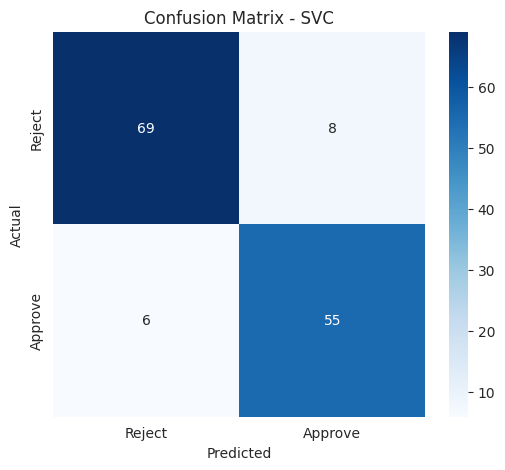

In [40]:
#confusion matrix
cm = confusion_matrix(y_test,ypred_test_svc)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Reject','Approve'], yticklabels=['Reject','Approve'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVC')
plt.show()

In [41]:
#Classification Report
print("------ Classification Report SVC ------")
print(clf_report_test_svc)

------ Classification Report SVC ------
              precision    recall  f1-score   support

           0       0.92      0.90      0.91        77
           1       0.87      0.90      0.89        61

    accuracy                           0.90       138
   macro avg       0.90      0.90      0.90       138
weighted avg       0.90      0.90      0.90       138



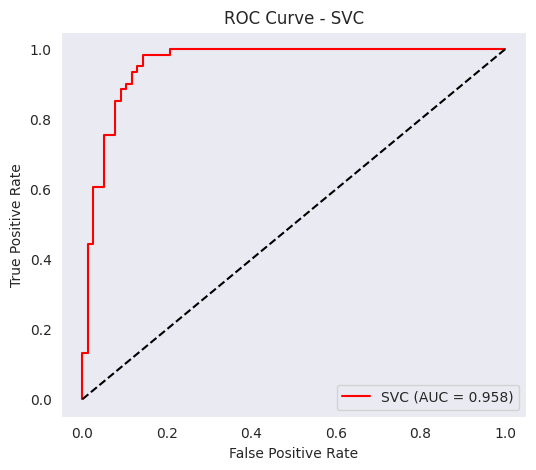

In [42]:
#ROC-AUC curve
yprob_svc = svc.predict_proba(X_test_preprocessed)[:,1]
auc_score = roc_auc_score(y_test, yprob_svc)
fpr, tpr, thresholds = roc_curve(y_test, yprob_svc)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"SVC (AUC = {auc_score:.3f})",color='red')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVC')
plt.legend(loc='lower right')
plt.show()

In [43]:
#saving model
joblib.dump(svc,'model.pkl')

['model.pkl']